# Helping our Officers

# Overview

The Baltimore City Police Department is tasked everyday to stop crime in one of the most crime ridden cities in the country.  In this project I will analyze some crime data for Baltimore in attempt to predict what weapon was used in a crime given the other features of the crime such as time of day, time of year, inside/outside, description, and so on.  In the get the data section I will describe the data and show the cleaning process I used as well.  Following, in the explore the data section I perform some exploratory data analysis to determine some stats and trends in the data.  Then I jump into the machine learning portion, first with a prepare data section to further tune the data towards being successful for our models, followed by the modeling section containing the models.  Next, I enhance the models to make them as good as they can be in the fine tune section.  I will then present my solution by interpreting and discussing the results and stating a conclusion/summary of the findings.  In this section I also state some of the limitations of this work and suggest some future strategies that might be able to help improve our results.  References and contributions listed at the bottom.

The question at hand here is if we can predict what weapon will be used in a particular victim based crime.  This would benefit police officers by either knowing before the crime happens what to be on the lookout for/prepared for or after the fact for when they arrive on the scene to know what to expect / be prepared for.

Based on a dummy model, if we simply predicted that every crime was commited with no weapon at all, we would have an accuracy score of: 78.7%.

So, we will make it our goal to beat that accuracy score with out model.  Can we predict what weapon will be used in a particular crime with a higher accuracy rate than 78.7%?

For this project, I chose to perform data analysis on Baltimore City crime data.  The motivation in analyzing this data is to find patterns and trends in crimes as well as run predictive analytics so that we may learn more information and be better prepared to stop crime.  This can be useful in numerous ways.  For example, say police are expecting a crime in a certain location at a certain time, and know a general description of it - they could also try to predict what weapon will be used in the crime to know what they will be up against and be prepared.  If there is a crime expected and a firearm is likely to be used, police should be ready for a gun fight.  Secondly, say the crime already happened and the police officer recieved a call giving a general location, and description - when enroute to the crime and arriving on the scene it would be helpful for them to know what kind of weapon they are up against.  This information can inform the officer of whether or not the suspect is likely to be armed, and what kind of person they are going to have to deal with so that they may be best prepared for the situation.

Those interested in the solution to this problem are the police officers themselves.  They are the ones putting their lives at stake each time out in the field working to prevent crime and save lives.  Others such as police departments and families may also be interested in the results as it can be seen as a way to recruit the best officers to your area if you have a system like this to protect their safety better while also allowing them to perform to the best of their ability; and their families being more comfortable each time their loved officer leaves the house - knowing that they have the best chance to come home safe and are doing a very important job preventing crime and saving lives.

Much exploration and discussion has been done on this topic in the past.  And police officers generally know the trends intuitively.  I actually had a discussion with UMBC Chief Police Officer Paul Dillon.  In this discussion, he mentioned things to look for in the data.  He said that the number of crimes tend to go up when the most people are out and about.  For example, the number of crime tends to be higher in the summer rather than winter - this is due to the larger number of people out in the warm summer weather.  Another example is crime goes down overnight - there are obviously less people out during that time to commit or be victims of a potential crime.  Clearly, there are trends within the crime data and amount of crime commited.  There is also trends in the weapon used based on the other factors involved.  One hot topic today is using machine learning to predict things about a crime.  Machine learning introduces the ability to draw conclusions and make connections between varibles that human analysts simply could not do themselves.

I also found a really good BBC artice here: [BBC Crime Prediction Article](https://www.bbc.com/news/business-46017239).  It explains the benefits of machine learnings predictive analytics and describes a model that tries to predict where and when certain crimes will occur over the next 12 hours.  And that algorithm is updated every day as new data comes in.  It says that police forces seem to be buying the idea and that the model has been incredibly accurate.  Models like this can do a good job at picking out the trends like hot spot areas for crime based on it features.  There are also negative side affects mentioned such as concerns about racial and other biases hidden in the datasets.  It very much pertains to our goals here as we try to predict the weapon used based on the other features of the crime.

# Get the Data

To perform this analysis, I will use a data set named "BPD Part 1 Victim Based Crime Data" from Open Baltimore ([BPD Part 1 Victim Based Crime Data](https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij/data)).  This data is updated every Monday, with a 9 day time lag to minimize changes to the data as records move throughout the BPD review process.  I exported this data as a CSV file and began the cleaning of it from there.  The data contains 16 columns and 313,634 rows.  Each row is a crime that took place and each column contains information about the crime such as its date, time, weapons used, district, premise and so on.  One limitation is that a lot of the weapons in the dataset are null, since for the purpose of this project our goal is to predict the type of weapon used, we will say that in the case the weapon used is null, there was no weapon used.  These cases where the weapon is null include cases where it is fairly obvious that no weapon is really applicable such as a car theft where there was no intervention between people, just the car stolen; or a burglary where the suspect broke in somewhere and robbed the place without a weapon or any interaction with a victim.  Another limitation is that the weapon may be classified as only one of 5 then categories: HANDS, KNIFE, FIREARM, OTHER, None.  With this, we can only predict one of those from this dataset and the OTHER category may not be too useful for an officer to know about.  But the cases of knowing when a FIREARM / KNIFE / HANDS are used would be very useful it is still a very important prediction as that informaiton is vital to saving lives on the streets of Baltimore.

The target column here is the weapon.  We wish to be able to predict the violence level of the crime by knowing the weapon before arriving to the scene or even before the crime happens.  I expect a handful of columns to be very useful in determining the weapon used.  Based on intuition and the chat with UMBC chief police officer Paul Dillon, I think that columns such as the crime time, date, whether it was inside or outside, and premise all would show a pattern in what weapon was used.

# Explore the Data

### Cleaning the Data

Prior to exploring the data, I first cleaned it to make it consistent and get the best results possible.

The following are the steps, techniques and assumptions I used to clean the data:
1.  I use pandas read_csv to read the csv file which had a 'utf-8' encoding.
2.  I look at the column names to analyze which columns are good for answering our questions, and which contain duplicate information/ are not valuable and can be gotten rid of.  The techniques I use here are the pandas dataframe info() and head() functions to gain a better understanding of the data.  I also scrolled through the csv in excel to eyball the data quickly to get a better understanding of it.
3. I use the rename function with a lamda function to replace the spaces and slashes with an empty string to get rid of them.  
4. After looking at head(), I see that it looks like the TotalIncidents column is always 1, so I count the number of values in that column equal to one and turns out, it is the same number as there are rows (313,634), meaning they are all 1, which tells us nothing and this column may be dropped.  
5. It looks like the contents of the vri_name1 column are contained in the District column.  That, combined with the fact that there are only 37,056 non-null values in the vri_name1 column leads me to the decision that it can be dropped for simplicity.  This should be noted that our results will not have any analysis of the vri_name1 column (some are slightly different than the district and this content will not be represented, we deem it unimportant for the time being but it could come into play later. 
6. After looking at the output of the info() function, it is determined that the column, Location1, has 0 non-null values and can obviously be dropped.
7. I drop those 3 columns (Location1, vri_name1, TotalIncidents) using the pandas drop function.
8. Now that the columns are set, I look at handling the missing values and inconsistencies. The data has 313,634 entries.  I look at the output of the pandas info() function to gain more information from about the numbers of null values.  The columns of CrimeTime, Location, InsideOutside, Weapon, Post, District, Neighborhood, Longitude, Latitude, Premise all contain null values.  
    * The weapon column only had 66,908 non-null values, with so many nulls, I made the assumption that a null weapon means no weapon was used and filled them with 'None' using the pandas fillna function.
    * CrimeTime and Post each had small amounts of null values, and there is not a great way to fill them without introducing bias to the data.  For example, filling the missing times with midnight would increase the number of crimes at midnight to more than they should be when doing time analysis.  So, any row with a null for CrimeTime or Post, I drop.
    * The remaining columns of Location, InsideOutside, Neighborhood, and Premise are all strings and we can easily replace their nulls with 'Unknown' so that we can keep those data rows, and at the same time keep in mind that there are unknowns when doing the analysis.
9. I clean other inconsistencies such as FIRE to FIREARM and I to Inside, O to Outside.
10. I write the cleaned pandas dataframe to a csv file to be loaded from the explore workbook.  For the code of this cleaning, please see the load_and_clean workbook.

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt # for visualizations
import numpy as np
import time

#ML Packages
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#pre-processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA

#metrics and reporting
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_validate

In [3]:
#read in the raw csv file
crime_data = pd.read_csv("../data/BPD_crime_data.csv", encoding= 'utf-8')

In [4]:
#Next we will begin the cleaning process

#Let's look to see what columns we can get rid of

#set the column names to be camelCase convention, contert the Inside/Outside column name
#simplest one-liner to just replace the / with ""
crime_data_correct_columns = crime_data.copy()
crime_data_correct_columns = crime_data_correct_columns.rename(columns= lambda x: x.replace("/", ""));
crime_data_correct_columns = crime_data_correct_columns.rename(columns= lambda x: x.replace(" ", ""));

#First, we notice that the 'Total Incidents' column is always 1, which tells us nothing so we get rid of it
#proven here by seeing the count is equal to the number of rows
print("Number of 1's in total incidents column: ", crime_data_correct_columns[crime_data_correct_columns.TotalIncidents == 1].count())

#Let's see if the info on the data:
crime_data.info()

#We notice that the 'Location 1' column has 0 non-null values, so that column can also be dropped
#It looks like the contents of the vri_name1 column are contained in the District column.  That, combined with the
#fact that there are only 37,056 non-null values in the vri_name1 column leads me to the decision that it can be
#dropped for simplicity.  This should be noted that our results will not have any analysis of the vri_name1 column
#(some are slightly different than the district and this content will not be represented, we deem it unimportant 
#for the time being but it could come into play later. 


#Drop those 3 columns
crime_data_correct_columns = crime_data_correct_columns.drop(columns=['TotalIncidents', 'vri_name1', 'Location1'])

crime_data_correct_columns.head(2)
crime_data_correct_columns.info()

Number of 1's in total incidents column:  CrimeDate         313634
CrimeTime         313609
CrimeCode         313634
Location          312020
Description       313634
InsideOutside     275344
Weapon             66908
Post              312916
District          312916
Neighborhood      312899
Longitude         313404
Latitude          313404
Location1              0
Premise           275094
vri_name1          37056
TotalIncidents    313634
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313634 entries, 0 to 313633
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        313634 non-null  object 
 1   CrimeTime        313609 non-null  object 
 2   CrimeCode        313634 non-null  object 
 3   Location         312020 non-null  object 
 4   Description      313634 non-null  object 
 5   Inside/Outside   275344 non-null  object 
 6   Weapon           66908 non-null   object 
 7   Post  

In [5]:
#Now that we have the columns we want, lets deal with the NaN values
#Judging by the output of info on the data frame:
#there are 313,634 entries.  The columns of CrimeTime, Location, InsideOutside, Weapon, Post, District,
#Neighborhood, Longitude, Latitude, Premise all contain null values.

#There are only 66,908 non-null values for Weapon, so I'm going to assume that if weapon is NaN, then there was
#no weapon used, as I believe that is more likely than these entries all being "missing" or "incomplete"

#copy the df to a new df to modify
crime_data_cleaned = crime_data_correct_columns.copy()

#build off the correct columns df and fill them with "None"
crime_data_cleaned.Weapon.fillna("None", inplace=True)

#continuing, for the CrimeTime, there are 25 NaN values.  Since there are little of them compared to the size
#of the dataset and to avoid adding any bias by filling with a time, I will remove these NaN entries
crime_data_cleaned.dropna(subset = ["CrimeTime"], inplace=True)

#same with Post, rather than filling and potentially introducing bias, we will remove rows with NaN there
crime_data_cleaned.dropna(subset = ["Post"], inplace=True)

#The rest of the columns that contain null values are String attributes and replacing the NaN values with "Unknown"
#we can do and take note of it so that we know about it when exploring the data.  But, it makes sense to keep
#these rows as we do not want to miss any information that these rows may contain.
crime_data_cleaned.Location.fillna("UNKNOWN", inplace= True)
crime_data_cleaned.InsideOutside.fillna("UNKNOWN", inplace= True)
crime_data_cleaned.Neighborhood.fillna("UNKNOWN", inplace= True)
crime_data_cleaned.Premise.fillna("UNKNOWN", inplace= True)

#We notice also that some values in the InsideOutside column are inconsistent - some labeled inside have values of
#just "I" and others have "Inside" normoalize these to be "I", "O", or the "Unknown"
crime_data_cleaned.loc[crime_data_cleaned.InsideOutside == "I", "InsideOutside"] = "Inside"
crime_data_cleaned.loc[crime_data_cleaned.InsideOutside == "O", "InsideOutside"] = "Outside"

#Again, there is an inconsistency in the weapon data - a few have FIRE instead of FIREARM, make the correction:
crime_data_cleaned.loc[crime_data_cleaned.Weapon == "FIRE", "Weapon"] = "FIREARM"

crime_data_cleaned.info()
crime_data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312891 entries, 0 to 313633
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CrimeDate      312891 non-null  object 
 1   CrimeTime      312891 non-null  object 
 2   CrimeCode      312891 non-null  object 
 3   Location       312891 non-null  object 
 4   Description    312891 non-null  object 
 5   InsideOutside  312891 non-null  object 
 6   Weapon         312891 non-null  object 
 7   Post           312891 non-null  float64
 8   District       312891 non-null  object 
 9   Neighborhood   312891 non-null  object 
 10  Longitude      312891 non-null  float64
 11  Latitude       312891 non-null  float64
 12  Premise        312891 non-null  object 
dtypes: float64(3), object(10)
memory usage: 33.4+ MB


,CrimeDate,CrimeTime,CrimeCode,Location,Description,InsideOutside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise
0,9/5/20,1:30:00,6G,800 PONTIAC AVE,LARCENY,Inside,None,913.0,SOUTHERN,BROOKLYN,-76.598564,39.233880,ROW/TOWNHOUSE-OCC
1,9/5/20,19:57:00,4E,4900 GUNTHER AVE,COMMON ASSAULT,Inside,None,443.0,NORTHEAST,FRANKFORD,-76.549157,39.327377,ROW/TOWNHOUSE-OCC
2,9/5/20,2:10:00,4D,600 MELVILLE AVE,AGG. ASSAULT,Inside,HANDS,515.0,NORTHERN,WAVERLY,-76.607271,39.331543,ROW/TOWNHOUSE-OCC
3,9/5/20,1:00:00,7A,AV & REISTERSTOWN RD,AUTO THEFT,Outside,None,611.0,NORTHWEST,LIBERTY SQUARE,-76.655664,39.322638,STREET
4,9/5/20,8:10:00,4C,1900 W FAIRMOUNT AVE,AGG. ASSAULT,Inside,OTHER,714.0,WESTERN,PENROSE/FAYETTE STREET OUTREACH,-76.647524,39.288932,ROW/TOWNHOUSE-OCC


In [6]:
#Now that we have cleaned the data, let's write it back to a csv so it may be loaded from any notebook
crime_data_cleaned.to_csv('../data/cleaned_data.csv', index = False)

### Exploring for Trends and Patterns



In [7]:
#read in the raw csv file
crime_data = pd.read_csv("../data/cleaned_data.csv", encoding= 'utf-8')

In [8]:
#Now lets start exploring the data!
#first lets do some analysis on what effect the CrimeTime and CrimeDate has on the level of crimes
#We need to first convert the date and time from object to datetime64 to do more analysis on it
crime_data["CrimeDate"] = crime_data["CrimeDate"].astype("datetime64")
crime_data["CrimeTime"] = crime_data["CrimeTime"].astype("datetime64")

In [9]:
#Let's first create a function that creates the df with counts to avoid code duplication:
def create_counts_df(group_x_axis, group_y_axis):
    counts_df = None #initialize here for scope
    if(group_x_axis == "CrimeDate"): #if looking at the date, look at the month
        counts_df = crime_data[group_x_axis].groupby([crime_data[group_x_axis].dt.month, crime_data[group_y_axis]]).count()
    elif(group_x_axis == "CrimeTime"): #if looking at the time, look at the hour
        counts_df = crime_data[group_x_axis].groupby([crime_data[group_x_axis].dt.hour, crime_data[group_y_axis]]).count()
    else: #otherwise, just use the value in the data
        counts_df = crime_data[group_x_axis].groupby([crime_data[group_x_axis], crime_data[group_y_axis]]).count()
    counts_df = counts_df.to_frame()
    counts_df.columns = ["Count"]
    counts_df = counts_df.reset_index()
    return counts_df

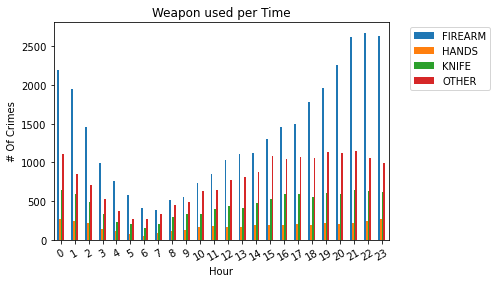

In [10]:
#Lets see if there are patterns for weapon based on time
weapon_time_df = create_counts_df("CrimeTime", "Weapon")
#First tried with including 'None' but too many are 'None' to see the other distributions
weapon_time_df = weapon_time_df[weapon_time_df.Weapon != 'None']

ax = weapon_time_df.pivot(index='CrimeTime', columns='Weapon').plot(kind='bar', title="Weapon used per Time", ylabel="# Of Crimes", xlabel="Hour", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARM', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Based on the visulaization, it looks like the times do indeed have an impact on the weapon type used.  The biggest takeaway looks to be that firearms are used more in the later hours of the night.  Take a look at the hours 15-23 - the level of crimes for using hands, knife, and other remain relatively constant but the use of firearms increases dramatically during this time frame.  This shows that after dark, it is more likely that a firearm may be used and police should be aware of this trend to be prepared for potential crimes involving firearms at that time.  We certainly will want to be aware that the time looks to have an impact on weapon used and add it into our model used to predict the weapon type.

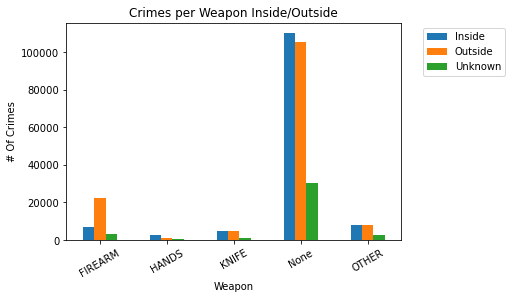

In [11]:
#Lets see if there are patterns for weapon based on inside/outside
weapon_I_O_df = create_counts_df("Weapon", "InsideOutside")

ax = weapon_I_O_df.pivot(index='Weapon', columns='InsideOutside').plot(kind='bar', title="Crimes per Weapon Inside/Outside", ylabel="# Of Crimes", xlabel="Weapon", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['Inside', 'Outside', 'Unknown']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Next, we analyze the trends of crimes inside vs. outside based on the weapon used.  From the visualization we see that when a firearm is used, it is more often than not used outside.  On the other hand, when hands are used it is more often than not used inside.  So, if police get reports of a shooting, there is a higher likelihood that they should be looking for the suspect outdoors.  If there is a report of a crime involving hands, they should be more prepared to handle and indoors crime.  This also says that if an officer is on duty outside, they should be better prepared for a shooting than officers inside - police more suited for shootings should be placed on duty in the outdoors.  This is important, because with shootings the severity of the crime may be escalated to a life or death situation and repsonding well to these could save lives.

The results from this exploratin show that including whether the crime happened inside or outside does appear to have an impact on the weapon used and we will want to include inside/outside in our model as a predictor of the weapon type.

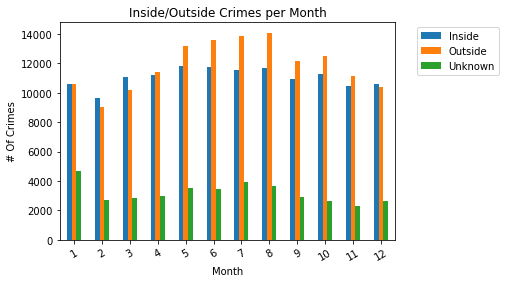

In [12]:
#Great, now lets see if there are patterns for inside/outside based on month of year
month_df = create_counts_df("CrimeDate", "InsideOutside")

ax = month_df.pivot(index='CrimeDate', columns='InsideOutside').plot(kind='bar', title="Inside/Outside Crimes per Month", ylabel="# Of Crimes", xlabel="Month", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['Inside', 'Outside', 'Unknown']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Now that we know whether a crime is inside/outside does appear to have an effect on the weapon type used, we can explore if the time of year has a relationship with the level of crimes inside/outside.

The data proves that depending on the time of year, they should be more prepared to stop crimes inside vs. outside.  For the warmer months of 4-11 (April - November) the number of crimes outside is higher than those inside.  For the other colder months of 12-3 (December - March) crimes inside vs. outside tend to have about the same or higher likelihood to be inside as they do outside.  The conclusion to be drawn here is that police should expect less crime outside during the colder months, and focus more resources on preventing the outside crime in the warmer months of the year.

With this, it may be useful to include the month in our model as if the crime was commited in a warmer month it may be useful to know.  If more crimes are known to happen outside in the summer months, it may lead to more FIREARMS being used in the summer months as well.

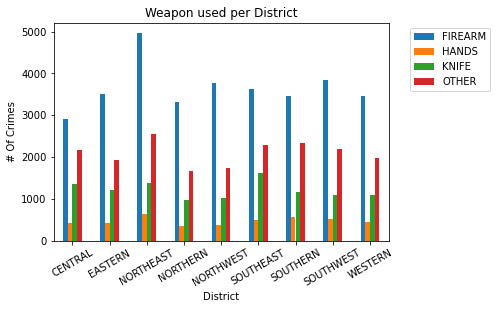

In [13]:
#Lets see if there are patterns for weapon based on District
weapon_district_df = create_counts_df("District", "Weapon")
#First tried with including 'None' but too many are 'None' to see the other distributions
weapon_district_df = weapon_district_df[weapon_district_df.Weapon != 'None']

ax = weapon_district_df.pivot(index='District', columns='Weapon').plot(kind='bar', title="Weapon used per District", ylabel="# Of Crimes", xlabel="District", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARM', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

The goal with this visualization is to determine whether or not there is a trend between district and the weapon used.  For example, do firearms tend to be used more frequently in the souther district as opposed to the western?  The data shows that each district looks about even in their distribution of weapon used.  None of them really stick out, the northeast has the highest usage of firearms by far, but they also have more crime in general with the other weapons as well (perhaps the northeast district is larger and hence results in more crime).  The conclusion here is that police in all districts should be able to handle all of these types of crime and the type of crime that occurs does not really depend on the district.

This conclusion tells us that the district may not have a huge impact on our ability to predict what weapon was used.  We may experiment with it in our model, but it may be a feature to leave out.

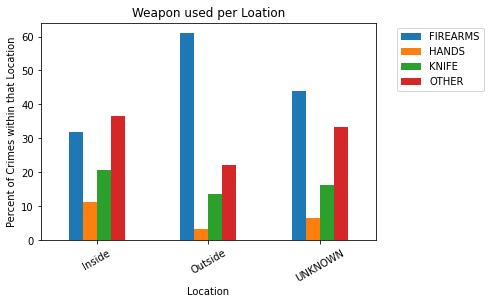

In [14]:
#Lets see if there are patterns for weapon based on InsideOutside
I_O_weapon_df = create_counts_df("InsideOutside", "Weapon")
#First tried with including 'None' but too many are 'None' to see the other distributions
I_O_weapon_df = I_O_weapon_df[I_O_weapon_df.Weapon != 'None']

#get some percentages, counts are less relevant, given inside/oustide what pct of crimes use that weapon?
#of the crimes that happen inside:
sum_outside = I_O_weapon_df[I_O_weapon_df.InsideOutside == 'Outside']['Count'].sum()
sum_inside = I_O_weapon_df[I_O_weapon_df.InsideOutside == 'Inside']['Count'].sum()
sum_unknown = I_O_weapon_df[I_O_weapon_df.InsideOutside == 'UNKNOWN']['Count'].sum()

def generate_pcts(I_O_weapon_df):
    pcts = []
    for index, row in I_O_weapon_df.iterrows():
        if(row['InsideOutside'] == "Inside"):
            pcts.append((row["Count"]/sum_inside)*100)
        elif(row['InsideOutside'] == "Outside"):
            pcts.append((row["Count"]/sum_outside)*100)
        else:
            pcts.append((row["Count"]/sum_unknown)*100)
    return pcts

I_O_weapon_df['pcts'] = generate_pcts(I_O_weapon_df)

ax = I_O_weapon_df.pivot(index='InsideOutside', columns='Weapon', values='pcts').plot(kind='bar', title="Weapon used per Loation", ylabel="Percent of Crimes within that Location", xlabel="Location", rot=30)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARMS', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

Building off the previous finding that firearms tend to be used outside, this time we look at the percentages of weapon used based on the location of inside vs. outside.  These findings agree with our previous findings.  Given that a crime is outside, over 60% of the time, a firearm was used, whereas a knife ~15% of the time, and hands ~5% of the time.  On the other hand, when a crime is commited inside, a firearm was used roughly 33% of the time, knife ~20% and hands ~10%.  Police should have these numbers in mind when stationed to spot crime to know what is likely to happen given the location/scenario they are in.

Here I show some more descriptive statistics to re-enforce the fact that the location of the crime does have an affect on the weapon type used.

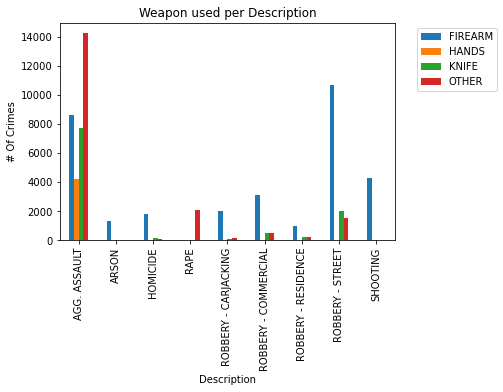

In [15]:
#Lets see if there are patterns for weapon based on description
description_weapon_df = create_counts_df("Description", "Weapon")
#First tried with including 'None' but too many are 'None' to see the other distributions
description_weapon_df = description_weapon_df[description_weapon_df.Weapon != 'None']

ax = description_weapon_df.pivot(index='Description', columns='Weapon').plot(kind='bar', title="Weapon used per Description", ylabel="# Of Crimes", xlabel="Description", rot=90)
patches, labels = ax.get_legend_handles_labels()
labels = ['FIREARM', 'HANDS', 'KNIFE', 'OTHER']
ax.legend(patches, labels, bbox_to_anchor=(1.05, 1.0), loc='upper left')

For the description of each crime, we can see the distribution of each weapon used.  The conclusion is that police will be able to know what weapon, if any, is likely to have been used or to be used given a particular crime took or might take place in the future.  The description of the crime clearly has an impact on the type of weapon that is being used - so we will definitely want to include it in our model.

# Prepare Data

To get the data ready to use in the models I will do some feature engineering first.

In [16]:
#here we create dummy features for each of the categorical columns we see as valuable for our model
#the pandas get_dummies function returns a dataframe with the dummies used for that column
#then I concat that dataframe onto the original and drop the original column
df = crime_data.copy() #copy the crime_data into df to use here
dummies = pd.get_dummies(df['InsideOutside'])
dummyDF = pd.concat([df, dummies], axis=1).drop(['InsideOutside'], axis=1)

dummies = pd.get_dummies(df['Description'])
dummyDF = pd.concat([dummyDF, dummies], axis=1).drop(['Description'], axis=1) #add onto the dummies DF

dummies = pd.get_dummies(df['Neighborhood'])
dummyDF = pd.concat([dummyDF, dummies], axis=1).drop(['Neighborhood'], axis=1) #add onto the dummies DF

dummies = pd.get_dummies(df['CrimeCode'])
dummyDF = pd.concat([dummyDF, dummies], axis=1).drop(['CrimeCode'], axis=1) #add onto the dummies DF

dummies = pd.get_dummies(df['Post'])
dummyDF = pd.concat([dummyDF, dummies], axis=1).drop(['Post'], axis=1) #add onto the dummies DF

dummies = pd.get_dummies(df['Premise'])
dummyDF = pd.concat([dummyDF, dummies], axis=1).drop(['Premise'], axis=1)
dummyDF = dummyDF.drop(['UNKNOWN'], axis=1) #unknown column is not going to tell us anything - drop it
dummyDF.head(2)

,CrimeDate,CrimeTime,Location,Weapon,District,Longitude,Latitude,Inside,Outside,AGG. ASSAULT,...,TRUCKING & TRANSFER,UTILITIES-BG&E-C&P,VACANT BUILDING,VACANT DWELLING,VACANT LOT/WOODS,VEHICLE,WAREHOUSE,WHOLESALE/DISC. STOR,YARD,YARD/BUSINESS
0,2020-09-05,2020-12-06 01:30:00,800 PONTIAC AVE,None,SOUTHERN,-76.598564,39.233880,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-09-05,2020-12-06 19:57:00,4900 GUNTHER AVE,None,NORTHEAST,-76.549157,39.327377,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In the crime data, the data I need to use is categorical.  The machine learning models used are not able to interpret the categorical data for training/predicting from the model.  For this reason, I have to convert the data to be numerical.  The way I do this is by creating dummy columns for each unique value within a single column.  For example let's look at the inside/outside column.  The possible values here are Inside, Outside, and UNKNOWN.  So, three new columns are created - Inside, Outside, and UNKNOWN.  If the value for a particular crime instance of the inside/outside column is Inside, the Inside column will have a 1 in it, and the Outside and UNKNOWN columns will each have 0's in them.  So, this tells our model that the crime was commited inside, and not outside or unknown.  I use this format for the premise and description as well - each of them have many more different unique values which means that we generate a lot of columns.  I did not use Location because there are so many different ones that the number of columns added to the model increases the complexity so much.  I did not use the District column because in our exploratory analysis I already found that it did not really have an impact on the weapon used and confimed that after some experimentation in the models that leaving it out did not hurt the accuracy.  The model can best understand the data in this format.

In [17]:
#Create columns for the hour and month, since they seem to have the highest impact
df["CrimeDate"] = df["CrimeDate"].astype("datetime64")
df["CrimeTime"] = df["CrimeTime"].astype("datetime64")

dummyDF['CrimeMonth'] = pd.DatetimeIndex(df['CrimeDate']).month
dummyDF['CrimeHour'] = pd.DatetimeIndex(df['CrimeTime']).hour
dummyDF.head()

,CrimeDate,CrimeTime,Location,Weapon,District,Longitude,Latitude,Inside,Outside,AGG. ASSAULT,...,VACANT BUILDING,VACANT DWELLING,VACANT LOT/WOODS,VEHICLE,WAREHOUSE,WHOLESALE/DISC. STOR,YARD,YARD/BUSINESS,CrimeMonth,CrimeHour
0,2020-09-05,2020-12-06 01:30:00,800 PONTIAC AVE,None,SOUTHERN,-76.598564,39.233880,1,0,0,...,0,0,0,0,0,0,0,0,9,1
1,2020-09-05,2020-12-06 19:57:00,4900 GUNTHER AVE,None,NORTHEAST,-76.549157,39.327377,1,0,0,...,0,0,0,0,0,0,0,0,9,19
2,2020-09-05,2020-12-06 02:10:00,600 MELVILLE AVE,HANDS,NORTHERN,-76.607271,39.331543,1,0,1,...,0,0,0,0,0,0,0,0,9,2
3,2020-09-05,2020-12-06 01:00:00,AV & REISTERSTOWN RD,None,NORTHWEST,-76.655664,39.322638,0,1,0,...,0,0,0,0,0,0,0,0,9,1
4,2020-09-05,2020-12-06 08:10:00,1900 W FAIRMOUNT AVE,OTHER,WESTERN,-76.647524,39.288932,1,0,1,...,0,0,0,0,0,0,0,0,9,8


Another couple of important features of the model and seen to have an impact on the weapon type used are the time of day and time of year.  In order to capture this in the model I created two new columns - the hour of day, and month of year.  I did this by extracting those values from the CrimeDate and CrimeTime columns.  The month is a value from 1-12 and the hour is a value from 0-23.  I decided to not use minutes or seconds becuase the those details within the hour do not intuitively make much of a difference.  For example, whether it is 1am or 1:30am is not likely to matter much just the fact that it is early in the morning.  Same for the day within a month - whether it is January 23 or 24th is not likely to matter much.  Our model can best understand these values to use as predictors.

An additional step we can do to help reduce the dimensionality of our data is use principle component analysis (PCA).  If we use all of the columns we did above as one-hot encoded then the data becomes 627 columns which can be a lot to feed into training models, and also a lot to store - especially if we continue to add to the dataset the new crimes that occur.  In order to speed up the training of our models and reduce redundancy thus reducing storage requirements, using PCA is an option.  Its goal is to be able to reduce the dimensionality of the data without losing any information (or losing the least amount of information possible).  Next I fit the data using PCA:

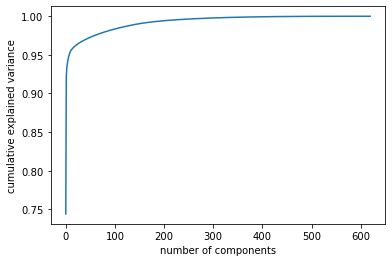

In [19]:
X = dummyDF.drop(['Weapon', 'CrimeDate', 'CrimeTime', 'Location', "District", 'Longitude', "Latitude"], axis=1)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

The first thing to do is to determine the number of components that I should use to fit the data.  There may be multiple approaches here - and when running something like this by my boss or to customers, it would be important to know what the space and speed requirements are.  The above visulaization shows that we do not need many components in order to explain 95% of the variance.  And pretty much all of the variance is explained by the time we have 200 components.  Below I fit using PCA for a few different levels to determine the benefits of each.

In [20]:
def getPcaTransformedData(numComponents):
    X = dummyDF.drop(['Weapon', 'CrimeDate', 'CrimeTime', 'Location', "District", 'Longitude', "Latitude"], axis=1)
    pca = PCA(n_components=numComponents)
    principalComponents = pca.fit_transform(X)
    return pd.DataFrame(data = principalComponents)

In [21]:
principalDf90percent = getPcaTransformedData(0.90)
principalDf90percent.head()

,0,1
0,12.200219,-2.493534
1,-5.796093,-2.445110
2,11.200439,-2.490571
3,12.179075,-2.500218
4,5.200556,-2.475702


In [22]:
principalDf95percent = getPcaTransformedData(0.95)
principalDf95percent.head()

,0,1,2,3,4,5,6,7
0,12.200219,-2.493534,-0.875886,-0.558108,-0.502348,0.224579,0.034334,-0.021366
1,-5.796093,-2.445110,-1.180386,1.173348,-0.120002,0.115945,-0.020050,-0.004873
2,11.200439,-2.490571,-0.792244,-0.093435,0.277563,-0.238261,0.957947,0.235056
3,12.179075,-2.500218,1.199048,0.032707,-0.047789,-0.830095,-0.475273,0.771383
4,5.200556,-2.475702,-0.853656,-0.093571,0.302307,-0.312682,1.208523,0.263633


In [23]:
principalDf99percent = getPcaTransformedData(0.99)
principalDf99percent.head()

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
0,12.200219,-2.493534,-0.875886,-0.558108,-0.502348,0.224579,0.034334,-0.021366,-0.842511,0.261900,...,-0.001937,0.004140,-0.001133,-0.005445,-0.006681,0.001735,0.004523,-0.001920,-0.012787,0.004282
1,-5.796093,-2.445110,-1.180386,1.173348,-0.120002,0.115945,-0.020050,-0.004873,-0.432836,0.087772,...,0.001339,0.007219,-0.001080,-0.006729,-0.000005,0.005650,0.006235,0.001101,0.004563,0.000453
2,11.200439,-2.490571,-0.792244,-0.093435,0.277563,-0.238261,0.957947,0.235056,-0.514001,0.062779,...,0.236610,0.990833,-0.131716,-0.379022,0.169346,0.282568,0.024494,-0.003923,-0.049745,-0.085825
3,12.179075,-2.500218,1.199048,0.032707,-0.047789,-0.830095,-0.475273,0.771383,-0.299385,0.040317,...,-0.001862,0.006605,-0.000464,0.012368,-0.001742,0.005729,0.034506,-0.008035,-0.022135,0.027584
4,5.200556,-2.475702,-0.853656,-0.093571,0.302307,-0.312682,1.208523,0.263633,-0.505989,-0.044972,...,-0.007760,0.000884,-0.001059,-0.005692,-0.005463,-0.001278,0.000026,0.000393,-0.001264,0.004178


# Modeling

In [24]:
#Function to Draw tree taken from python utils file

def draw_tree(estimator, figsize =(15, 5), feature_names = ["Hits", "Years"]):
    """
    Takes a decision  tree estimator and plots it's tree structure
    :param estimator: A sklearn decision tree estimator. Should be fitted.
    :param figsize: tuple. (int, int).
    :param feature_names:
    :return: It returns a plot. The image is not saved.
    """
    fig = plt.figure(figsize= figsize)
    _ = tree.plot_tree(estimator,
                       feature_names= feature_names,
                       filled=True)

In [59]:
## here let's apply sklearn DecisionTreeClassifier
# this is a function that takes in pandas dataframe as the dataset and from it computes the decision tree, aiming
# to predict the weapon, and prints out a confusion matrix, report, and tree itself
def createDecisionTree(dataSet, max_leaf_nodes_in= 5, min_impurity_split_in=None, ccp_alpha_in=0.0):
    y = dummyDF['Weapon'] #set the goal to be the classification
    X_train, X_test, y_train, y_test = train_test_split(dataSet, y, test_size=0.20, random_state = 1, stratify = y) #split the data

    start = time.time()
    classifier = DecisionTreeClassifier(max_leaf_nodes= max_leaf_nodes_in, min_impurity_split=min_impurity_split_in, ccp_alpha=ccp_alpha_in) #create the classifier and fit it
    classifier.fit(X_train, y_train)
    end = time.time()
    print("Time taken: " + str(end - start))

    y_pred = classifier.predict(X_test)  #predict using the test data for metrics

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    draw_tree(classifier,feature_names= X_train.columns)
    
    cv_fivefold = cross_validate(estimator= classifier, 
                     X = dataSet,
                     y = y,
                     cv = 5,
                     return_train_score= True, 
                     return_estimator= True, verbose = 2)
    validation_mean = cv_fivefold['test_score'].mean()
    validation_std = cv_fivefold['test_score'].std()
    print('Decision Tree 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))
    
    return classifier

Time taken: 7.0129499435424805
[[ 3828     0     0  2737     0]
 [    0     0   842     0     0]
 [    0     0  1569   604     0]
 [    0     0     0 49235     0]
 [    0     0     0   953  2811]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     FIREARM       1.00      0.58      0.74      6565
       HANDS       0.00      0.00      0.00       842
       KNIFE       0.65      0.72      0.68      2173
        None       0.92      1.00      0.96     49235
       OTHER       1.00      0.75      0.86      3764

    accuracy                           0.92     62579
   macro avg       0.71      0.61      0.65     62579
weighted avg       0.91      0.92      0.91     62579



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   7.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV] ................................................. , total=   6.1s
[CV]  ................................................................
[CV] ................................................. , total=   6.9s
[CV]  ................................................................
[CV] ................................................. , total=   8.2s
[CV]  ................................................................
[CV] ................................................. , total=   8.3s
Logistic Regression 5-fold cv results (Accuracy) 0.918 =/- 0.003


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.4s finished


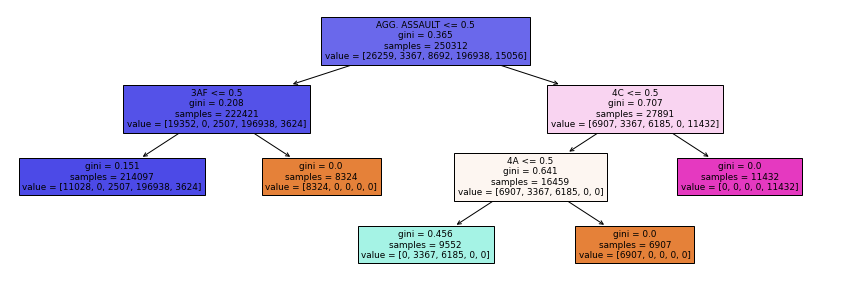

In [58]:
#first lets run it with the raw data itself
classifier = createDecisionTree(dummyDF.drop(['Weapon', 'CrimeDate', 'CrimeTime', 'Location', "District", 'Longitude', "Latitude"], axis=1))

The model results here give us hope that we will be able to beat the 78.7% accuracy rate of the dummy model.  In the results above we see that the accuracy of this model is 92%.  In this experiment I made the max leaf nodes stop at 5 so that the top of the tree could more clearly be seen and interpreted.  In attempt to try to make the decision tree better I attempt another experiment using corss validation next as well as with the different PCA created dataframes.  The top left of the output also contains a confusion matrix.  The vertical axis of this table is the actual classification and the horizontal is the predicted.  So, the numbers along the diagnal are the correctly classified ones.  The accuracy is therefore the sum of the numbers along the diagnal divided by the total sum.  Recall refers to a horizontal row within the confusion matrix - for actual class 0 (FIREARM), there were 3828+0+0+2737+0 for 6565 total of the actual class and 3828 were classified correctly so recall is 3828/6565 or 0.58.  Precision refers to a vertical column in the confusion matrix - for predicted class 0 (FIREARM), there were 3828+0+0+0+0 for a total of 3828 total predicted as class 0 (FIREARM), and 3828 were classified correctly, so precision is 3828/3828 or 1.00.  Also notice that in this model, it never predicts hands.  This weapon occurs the least in the dataset and the model did not find that fitting to them would be optimal.  Something to note, expecially with only going down to 5 leaf nodes, the model here is likely underfit to the data and may be able to perform better with different parameters.

So, in fine-tuning the model I will use GridSearchCV to perform cross-validation to find a better performing model.

There are many reasons I decided to use cross-validation.  First, compared to a leave-one-out approach, it is more computationally friendly.  Second, there are many benefits of using it.  The goal of machine learning here is to minimize the error in the tests, which are predicting/classifying for never seen before data.  When using cross validation, all data is used as both training and testing data as in our 10-fold cross validation, 10 different models are created for each depth, using 10% of the data for testing in each model and 90% for training.  Each increment of the 10% test data is stepped through, with the remaining 90% being the training data.  So, every data observation is used for testing at least once and every observation is used for training k-1 times.  When we have a bunch of models, the thought is to potentially combine them into one stronger model.

Another benefit is its balance for the variance-bias trade-off.  It has lower bias than just a single validation set approach since a single validation set approach is more dependent on how good the random split of the test and training sets was.  It also has lower variance than leave-one-out-cross-validation (LOOCV) as the model is more generalized rather than overfitting by training with all but one observation in the data.

In turn, we look to see what we can get out of these decision tree results.  Decision trees are built based on splitting each division by what will give the least amount of impurity.  We can use one of two techniques: Gini or Entropy.

Gini is measured by:

$\large G = 1 - \Sigma_i p_{i}^2$,

Where $p_{i}$ is the fraction of items labeled with class $i$ in the set.

We determine the information gain by calculating the entropy.  Entropy is given by:

$\large E = -\Sigma_i p_i\log_2(p_i)$,

Both Gini and Entropy are measures of impurity and used to calculate information gain.  Entropy is always between 0 and 1, the closer it is to 0 the better.  The higher the entropy, the more disordered the group is.  Information gain is the entropy of the parent group minus the entropy of the split so performance is maximized by minimizing the splits entropy.  It follows that when decision trees are created, they examine the entropy/gini of all possible splits, and choose the split with the highest information gain.

Knowing this, we can interpret our decision tree results.  In the graphic I created we see the root split is split based off of the Agg. Assault feature.  Then by 3AF, 4AC, and 4C which are crime codes.  This tells us that these are the most important features when determining the type of weapon used.  Note that these features are led by a crime description and then some crime codes.  Obviously, if the description of the crime is a shooting, a firearm is much more likely to have been used.  The crime description as well as code appear to have the largest impact on the type of weapon used.

Let's see if the raw data or PCA dataset performs best:

[[ 6283     0     0   282     0]
 [  842     0     0     0     0]
 [  591     0  1569    13     0]
 [ 1107     0     0 48128     0]
 [  908     0     0    45  2811]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     FIREARM       0.65      0.96      0.77      6565
       HANDS       0.00      0.00      0.00       842
       KNIFE       1.00      0.72      0.84      2173
        None       0.99      0.98      0.99     49235
       OTHER       1.00      0.75      0.86      3764

    accuracy                           0.94     62579
   macro avg       0.73      0.68      0.69     62579
weighted avg       0.94      0.94      0.94     62579

Time taken: 22.53574228286743


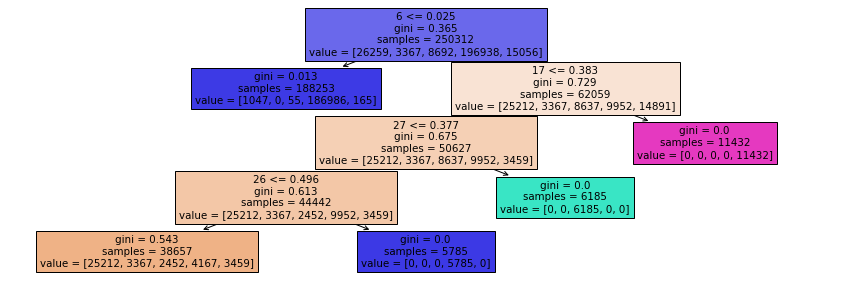

In [27]:
# PCA 99% variance
classifier = createDecisionTree(principalDf99percent)

[[ 6227    34     0   282    22]
 [  369   473     0     0     0]
 [ 2070    90     0    13     0]
 [ 2493     0     0 46742     0]
 [  978     0     0    45  2741]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     FIREARM       0.51      0.95      0.67      6565
       HANDS       0.79      0.56      0.66       842
       KNIFE       0.00      0.00      0.00      2173
        None       0.99      0.95      0.97     49235
       OTHER       0.99      0.73      0.84      3764

    accuracy                           0.90     62579
   macro avg       0.66      0.64      0.63     62579
weighted avg       0.91      0.90      0.89     62579

Time taken: 4.420022010803223


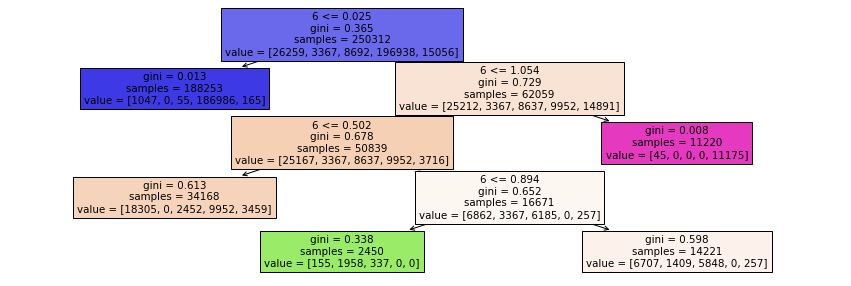

In [28]:
# PCA 95% variance
classifier = createDecisionTree(principalDf95percent)

[[    0     0     0  6565     0]
 [    0     0     0   842     0]
 [    0     0     0  2173     0]
 [    0     0     0 49235     0]
 [    0     0     0  3764     0]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     FIREARM       0.00      0.00      0.00      6565
       HANDS       0.00      0.00      0.00       842
       KNIFE       0.00      0.00      0.00      2173
        None       0.79      1.00      0.88     49235
       OTHER       0.00      0.00      0.00      3764

    accuracy                           0.79     62579
   macro avg       0.16      0.20      0.18     62579
weighted avg       0.62      0.79      0.69     62579

Time taken: 4.2485010623931885


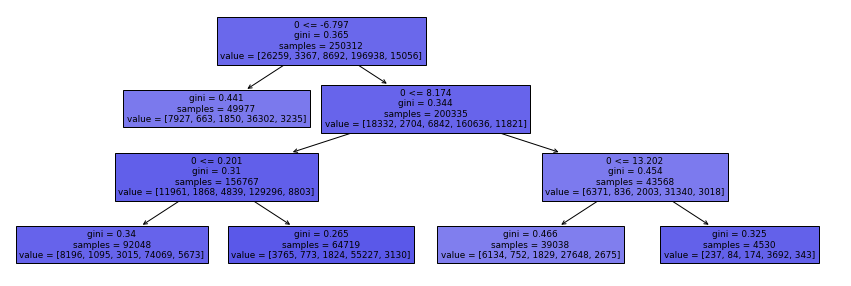

In [29]:
# PCA 90% variance
classifier = createDecisionTree(principalDf90percent)

I attempted using PCA for retaining 90%, 95%, and 99% of the variance.  The 90% model did not do great, only predicting 79% accurately and closer to the line of the dummy model.  That one I will throw out easily as it appears we need more that the 2 features it has to accurately predict the weapon.  One thing to note here with the PCA driven features, the interpretability of the results becomes pretty meaningless.  Knowing that feature 0 is the most important does not help in us knowing what part of the crime is most telling for what impacts the type of weapon used the most.  Lets compare the results of the 99% and the 95% variance models.  Examining the 99% results, this actually yields a higher accuracy than the results with the raw data.  It cuts down on the number of features from the 627 to 148.  It takes slightly longer to train, but the accuracy benefits might be worth it.  On the other hand with the 95% model, it takes less time to train, and still has an accuracy rate of 90%.  It also predicts hands better than the other models do.  The best model we can determine based on speed needs and perhaps the desired accuracy for each type of weapon.  Maybe we even try to combine the models and use the 95% one in conjunction with the 99% one so that we can accurately predict when hands or knife will be used.  Maybe if the 95% model predicts hands we will say hands, otherwise go with what the 99% model predicted.  We can also make a determination based on how often we expect to need to train the model.  For the purposes of this project - I will pick the 99% model since I think we care more about the accuracy of it in total rather than the train speed as we can replace the old model whenever the new one is done training.  So, lets do the fine-tuning with the 99% PCA model since it gives the highest test accuracy.

In [61]:
#Now lets try logistic regression
# this is a function that takes in the dataset and the parameters for the logistic regression function,
# fits the model outputs the results and returns the fitted model.
def createLogisticRegression(data, C_in= 1.0, penalty_in='l2', solver_in='lbfgs', max_iter_in=100):
    start = time.time()
    y = dummyDF['Weapon'] #set the goal to be the classification
    lr = LogisticRegression(C = C_in, penalty = penalty_in, solver = solver_in, max_iter= max_iter_in)
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=0)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    end = time.time()
    print("Took " + str(end - start) + " seconds to train.")
    print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(lr.score(X_test, y_test)))
    
    cv_fivefold = cross_validate(estimator= lr, 
                         X = data,
                         y = y,
                         cv = 5,
                         return_train_score= True, 
                         return_estimator= True, verbose = 2)
    validation_mean = cv_fivefold['test_score'].mean()
    validation_std = cv_fivefold['test_score'].std()
    print('Logistic Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))
    
    return lr

In [34]:
#Now lets try logistic regression
lr = createLogisticRegression(dummyDF.drop(['Weapon', 'CrimeDate', 'CrimeTime', 'Location', "District", 'Longitude', "Latitude"], axis=1))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Took 53.985719203948975 seconds to train.
Accuracy of logistic regression classifier on test set: 1.000


In [35]:
lr = createLogisticRegression(principalDf99percent)

Took 14.437321901321411 seconds to train.
Accuracy of logistic regression classifier on test set: 0.983


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
lr = createLogisticRegression(principalDf95percent)

Took 7.815073013305664 seconds to train.
Accuracy of logistic regression classifier on test set: 0.876


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
lr = createLogisticRegression(principalDf90percent)

Took 3.9182629585266113 seconds to train.
Accuracy of logistic regression classifier on test set: 0.786


Looking at the results of the logistic regression, we were actually able to get up to 100% accuracy by using the full raw dataset features.  By using the PCA dimensionality reduction, the best solution would probably be the 99% variance dataset again as it still has an accuracy of 98.3% while has a speed-up in training from roughly 54 seconds all the way down to about 13 seconds.  The 95% and 90% variance models are faster to train at about 9 and 4 seconds respectively but the accuracy trade-off is probably not worth the speed up as their accuracies are about 87.6% and 78.6% respectively; over 10% worse than the PCA model capturing 99% of the variance.

In [53]:
## here let's apply sklearn Random Forest Classifier
# this is a function that takes in pandas dataframe as the dataset and from it computes the random forest, aiming
# to predict the weapon, and prints out a confusion matrix, report, and tree itself
def createRandomForest(dataSet, max_leaf_nodes_in= None, min_impurity_split_in=None, n_estimators_in=100, max_features_in='auto'):
    y = dummyDF['Weapon'] #set the goal to be the classification
    X_train, X_test, y_train, y_test = train_test_split(dataSet, y, test_size=0.20, random_state = 1, stratify = y) #split the data

    start = time.time()
    classifier = RandomForestClassifier(max_leaf_nodes= max_leaf_nodes_in, min_impurity_split = min_impurity_split_in, n_estimators =n_estimators_in, max_features= max_features_in) #create the classifier and fit it
    classifier.fit(X_train, y_train)
    end = time.time()
    print("Training took: " + str(end - start) + " seconds.")

    y_pred = classifier.predict(X_test)  #predict using the test data for metrics

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    cv_fivefold = cross_validate(estimator= classifier, 
                         X = dataSet,
                         y = y,
                         cv = 5,
                         return_train_score= True, 
                         return_estimator= True, verbose = 2)
    validation_mean = cv_fivefold['test_score'].mean()
    validation_std = cv_fivefold['test_score'].std()
    print('Random Forest 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))
    
    return classifier

In [39]:
rf = createRandomForest(dummyDF.drop(['Weapon', 'CrimeDate', 'CrimeTime', 'Location', "District", 'Longitude', "Latitude"], axis=1))

[[ 6565     0     0     0     0]
 [    0   842     0     0     0]
 [    0     0  2173     0     0]
 [    0     0     0 49235     0]
 [    0     0     0     0  3764]]
              precision    recall  f1-score   support

     FIREARM       1.00      1.00      1.00      6565
       HANDS       1.00      1.00      1.00       842
       KNIFE       1.00      1.00      1.00      2173
        None       1.00      1.00      1.00     49235
       OTHER       1.00      1.00      1.00      3764

    accuracy                           1.00     62579
   macro avg       1.00      1.00      1.00     62579
weighted avg       1.00      1.00      1.00     62579

Training took: 89.8864049911499 seconds.


In [40]:
rf = createRandomForest(principalDf99percent)

[[ 6490     0     9    56    10]
 [    0   842     0     0     0]
 [   16     0  2049    46    62]
 [   32     0    15 49174    14]
 [   28     0    66    50  3620]]
              precision    recall  f1-score   support

     FIREARM       0.99      0.99      0.99      6565
       HANDS       1.00      1.00      1.00       842
       KNIFE       0.96      0.94      0.95      2173
        None       1.00      1.00      1.00     49235
       OTHER       0.98      0.96      0.97      3764

    accuracy                           0.99     62579
   macro avg       0.98      0.98      0.98     62579
weighted avg       0.99      0.99      0.99     62579

Training took: 943.1336760520935 seconds.


In [52]:
rf = createRandomForest(principalDf95percent)

[[ 6289     0    52   161    63]
 [    0   842     0     0     0]
 [  128     0  1860    80   105]
 [  279     0    21 48867    68]
 [  218     0   168    95  3283]]
              precision    recall  f1-score   support

     FIREARM       0.91      0.96      0.93      6565
       HANDS       1.00      1.00      1.00       842
       KNIFE       0.89      0.86      0.87      2173
        None       0.99      0.99      0.99     49235
       OTHER       0.93      0.87      0.90      3764

    accuracy                           0.98     62579
   macro avg       0.94      0.94      0.94     62579
weighted avg       0.98      0.98      0.98     62579



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  38.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.7s remaining:    0.0s


[CV] ................................................. , total=  37.0s
[CV]  ................................................................
[CV] ................................................. , total=  36.8s
[CV]  ................................................................
[CV] ................................................. , total=  42.0s
[CV]  ................................................................
[CV] ................................................. , total=  37.2s
Logistic Regression 5-fold cv results (Accuracy) 0.974 =/- 0.002
Training took: 246.620187997818 seconds.


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.4min finished


In [42]:
rf = createRandomForest(principalDf90percent)

[[ 4473    21    90  1781   200]
 [   35   319   246   204    38]
 [  159   210  1136   456   212]
 [ 1151    65   144 47714   161]
 [  315    16   184   733  2516]]
              precision    recall  f1-score   support

     FIREARM       0.73      0.68      0.70      6565
       HANDS       0.51      0.38      0.43       842
       KNIFE       0.63      0.52      0.57      2173
        None       0.94      0.97      0.95     49235
       OTHER       0.80      0.67      0.73      3764

    accuracy                           0.90     62579
   macro avg       0.72      0.64      0.68     62579
weighted avg       0.89      0.90      0.89     62579

Training took: 72.41948890686035 seconds.


A random forest is a collection of decision trees, meant to be more robust than a single decision tree.  With that, the accuracy of random forests tends to be better than that of a regular decision tree but the interpretability drops and they take longer to train.  Looking at the above results, we can get the same 100% accuracy with the decision tree that we got with logistic regression but in this case the model takes longer to train.  For the instance where we use all of the raw data, this random forest took ~98 seconds to train whereas it only took about 54 seconds in the logistic regression model.  The modeling decision again will be based on needs.  Here the 95% PCA variance model achieved a 98% accuracy level but took 45 seconds to train.  So while it takes longer than the logistic regression to train, we would have to store less data.  In our case, I'm going to say storage is cheap and we care more about speed, so the logistic regression model appears to be the best.  It's accuracy is better than any of the regular decision tree models, and its speed is better than these random forests.

Please note that these models are somewhat variable based on the randomness of the train test split and that when you run it the results may be different.

Next, lets fine tune the logistic regression model to ensure we make it the best it can be.

# Fine-Tune the Model

I used GridSearchCV to run a bunch of different parameters on all of the models in order to determine which one is the best.  For the purposes of this project, since this report is getting long and we already determined above that logistic regression was the best, I will only show the results of the logistic regression tuning. The others were still experimented with as different parameters could lead to different better results for the other models.  It turns out that the logistic regression is the best model to use with the measures of performance being the mean_test_score and the time it takes to train the model.  One thing that is not captured well by the GridSearchCV is the time it takes to train.  The GridSearchCV on the logistic regression is seen below:  I also tried different parameters that took a while to run this with.  I shortened the length here so that it was faster to demonstrate.

In [48]:
#Grid Search CV with logistic regression
#now lets try to find the best parameters for logistic regression
#grid = {'C': [1, 10], 'penalty': ['l1', 'l2', 'none'], 'solver' : ['saga', 'lbfgs', 'sag', 'newton-cg'], "max_iter":[100,200]}
grid = {'C': [1, 10], 'penalty': ['l1', 'l2', 'none'], 'solver' : ['saga', 'lbfgs'], "max_iter":[100,200]}
#grid = {'C': [1], 'penalty': ['l2'], 'solver' : ['lbfgs'], "max_iter":[100]}
grid_search_cv = GridSearchCV(estimator = lr, param_grid= grid, cv =5, return_train_score= True, verbose= 2)
y = dummyDF['Weapon'] #set the goal to be the classification
grid_search_cv.fit(principalDf99percent, y)
grid_search_cv.cv_results_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ...... C=1, max_iter=100, penalty=l2, solver=lbfgs, total=  19.6s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ...... C=1, max_iter=100, penalty=l2, solver=lbfgs, total=  19.7s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ...... C=1, max_iter=100, penalty=l2, solver=lbfgs, total=  19.3s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ...... C=1, max_iter=100, penalty=l2, solver=lbfgs, total=  18.2s
[CV] C=1, max_iter=100, penalty=l2, solver=lbfgs .....................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ...... C=1, max_iter=100, penalty=l2, solver=lbfgs, total=  20.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'mean_fit_time': array([19.23754382]),
 'std_fit_time': array([0.58967153]),
 'mean_score_time': array([0.11185985]),
 'std_score_time': array([0.01983409]),
 'param_C': masked_array(data=[1],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[100],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_solver': masked_array(data=['lbfgs'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}],
 'split0_test_score': array([0.98202272]),
 'split1_test_score': array([0.98323692]),
 'split2_test_score': array([0.98076001]),
 'split3_test_score': array([0.98274154]),
 'split4_test_score': array([0.9844514]),
 'mean_test_score': array([0.98264252]),
 'std_test_score': ar

In [49]:
pd.DataFrame(grid_search_cv.cv_results_ ).sort_values('mean_test_score', ascending = False).T

,0
mean_fit_time,19.2375
std_fit_time,0.589672
mean_score_time,0.11186
std_score_time,0.0198341
param_C,1
param_max_iter,100
param_penalty,l2
param_solver,lbfgs
params,"{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'so..."
split0_test_score,0.982023


The above logistic regression model uses GridSearchCV to run 48 candidates, totaling 240 fits.  This can take a very long time to run as fitting 240 fits when some take several minutes is very time consuming.  The other options are there based on the need for speed.  Logistic regression is built off conditional probablility where we give a probability for each class given the features and take the highest one.  The optimal model I found was using the defaults with a C parameter of 1, the l2 penalty, lbfgs solver, and 100 max iterations.  The 100 max iterations helps to reduce the chance of overfitting.  The C paramerter is the inverse of regularization strength and smaller values specify stronger regularization.  In this case, on average, the model predicted the correct classification 98.3% of the time which is much better than the 78.7% of the dummy model.

Here is the optimal logistic regression model and the one we chose to represent our solution:


In [62]:
# Optimal logistic regression model
lr = createLogisticRegression(principalDf99percent)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Took 14.12398099899292 seconds to train.
Accuracy of logistic regression classifier on test set: 0.983


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................................................. , total=  15.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.3s remaining:    0.0s
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................................................. , total=  25.9s
[CV]  ................................................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................................................. , total=  29.9s
[CV]  ................................................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................................................. , total=  17.7s
[CV]  ................................................................


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] ................................................. , total=  16.6s
Logistic Regression 5-fold cv results (Accuracy) 0.983 =/- 0.001


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished


# Presenting the Solution

### Results and Discussion

Decision tree Results:

Original features: 92% accurate, 10 seconds

PCA 99% variance captured: 94% accurate, 18 seconds

PCA 95% variance captured: 90% accurate, 4.3 seconds

PCA 90% variance captured: 79% accurate, 3.9 seconds



Logistic Regression Results:

Original features: 100% accurate, 54.4 seconds

PCA 99% variance captured: 98.3% accurate, 13.6 seconds

PCA 95% variance captured: 87.6% accurate, 8.8 seconds

PCA 90% variance captured: 78.6% accurate, 4.2 seconds



Random Forest Results:

Original features: 100% accurate, 98 seconds

PCA 99% variance captured: 99% accurate, 414 seconds

PCA 95% variance captured: 98% accurate, 45 seconds

PCA 90% variance captured: 90% accurate, 77 seconds


Let's begin with analyzing the results of the decision tree.  The decision tree was able to predict the weapon used at best 94% accuracy, when using the PCA generated data capturing 99% of the original variance.  This was the lowest of the accuracies that I saw as both logistic regression and random forests were able to reach 100% accuracy.  For the decision tree, the timing of the PCA generated data actually took longer than the full feature vector.  The reason for this could perhaps be that with the PCA generated data, the tree took longer to reach the leaves as it took more levels to resolve the classifications.  The timing of it using the 99% variance model was also worse than the logistic regression as it took about 18 seconds compared to the roughly 13 for logistic regression.  For these reasons I ruled out the decision tree as the best model as its speed and performance were not the best of the models.  The biggest advantage of the decision tree is its interpretability, which we could still use it for.  If we train the decision tree model using the full raw data rather than any PCA reduced model, we can see the most important feature at the root while the next most important trickle down the tree.  With this, we saw that the crime description agg. assault was the root, and the crime codes of 3AF, 4AC, and 4C were next as the crime code seems telling in what weapon type was used.

Next, I look to compare the results of the random forest to logistic regression.  Both of these models achieved 100% accuracy when given the full raw dataset.  With this, the random forest took about 98 seconds whereas the logistic regression model only took about 54 seconds.  Using the 99% variance model from PCA, logistic regression speeds up to about 13 seconds with 98.3% accuracy while the random forest accuracy drops to 99% but takes 414 seconds to train.  The difference in training time is so dramatic compared to the little difference in accuracy that I say the logistic regression model is better than the random forest model.  Dropping down to the 95% variance PCA model, the random forest achieves 98% accuracy but takes 45 seconds to train whereas the logistice regression takes about 9 seconds and recieves about 88% accuracy.  In this case the accuracy of the random forest model seems preferable, but it takes 45 seconds to get the 98% accuracy; logistic regression can beat that 98% accuracy after training for just 13 seconds.  So for this reason balancing the time-accuracy trade-off I determine that the best model is the logistic regression model, using the PCA generated data that captures 99% of the variance in the original dataset.

Please note that these accuracies will change a little bit based on the randomness of the train test splits if the random seed is not set.

### Conclusion and Summary

The conclusion of the findings in this project is that we can predict the weapon used better than the dummy model.  The original goal of this classification model was to predict the weapon used during any particular crime with an accuracy of better than 78.7%.  This tells us that the features of time of day, time of month, premise, crime description, and whether it was inside or outside do indeed help in predicting the weapon used.  This also means that the realationships we saw in the exploratory analysis between each of those features and the weapon used were taken advantage of by the model as it learned them and used them to predict the weapon used based on the values of those features.  We found that the model was able to predict the weapon used with basically a 100% accuracy level which is way better than a police officer going in blindly not knowing what weapon might be used.  I found that the best single model to use is the logistic regression model as when balancing the speed with the accuracy it seemed like the best way to go.  My proposal here will be to use the PCA generated data that captures 99% of the original dataset as the speedup in training is dramatic.  At the same time, if the failure to predict the weapon type that 1-2% of the time is extremely crutial to police officers safety, the extra time it takes to train may be worth it to save the lives of officers and potential victims.  The limitation here is that I do not know exactly what a police officer would value more - accuracy or speed up.

I also found that the most important factors in determining which weapon was used in a crime was the crime description and crime type as they were split on early and often in the decision tree.  These features had the biggest realitionship with the weapon type used and this makes sense as a firearm is obviously more likely to be used in a shooting than a robbery and it is good that the model picked this information up well.  All in all, the features used in this model do help determine the weapon used and based on them we can give police a very good prediction as to what weapon will be used in any particular crime.

Compared to the work of others, I'd say that these results are right on par with the industry.  It looks like using machine learning and artificial intelligence has worked very well for predicting crime before and when it happens, based on its features or projected features.  And we saw that here - the features of the crime very much so help to predict the weapon type used.  If we know the features of the crime or what features we can project for a certain expected crime, we can know what weapon type will be used in that crime.


# Limitations and Future Work

One of the challenges to exploring this data is finding trends that are specific down to a specific address, latitude or longitude.  There are so many unique addresses and coordinates that analyzing each and everyone of these situations is difficult.  Another limitation is in the nature of the data being categorical data.  Categorical data is a little bit more of a challenge to represent in these machine learning models and the feature engineering portion of the project is important to represent the data well in the models.  The use of PCA to perform dimesnionality reduction helps to speed up the process of training, but also loses some informatino and hurts interpretability.  With so many features, the data also becomes nearly impossible to visualize.

For future work, I think the biggest concern I have is actually gearing these results towards what police want and need.  I should continue the conversation with police to determine what question to answer would be the most helpful for them to know.  Perhaps they only really care if a firearm is used or not - in which case I could revise the work to predict either firearm or not firearm.  I could also expand in the questions I answer for example if we can potentially predict other things such as whether the crime was inside or outside.  There may be also be further discussions with police as to what the consequences are when the prediction is wrong and in which case the consequenses are most severe so that we minimize the chance of that happening.  Another future improvement is setting up a job that would run regularly to get the latest crime data and constantly be updating the model whenever new data becomes available.

# References and Contributions

Data contributions:
- Open Baltimore: https://data.baltimorecity.gov/Public-Safety/BPD-Part-1-Victim-Based-Crime-Data/wsfq-mvij/data

Machine learning references and contributions:
- Professor Guner's lecture notes
- Sklearn documentation: https://scikit-learn.org/stable/index.html
- ISLR Textbook: https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf
- Dealing with categorical data: https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/
- Feature Engineering guidance: https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/
